# The Sparks Foundation

## Data Science & Buisness Analytics Task
### Graduate Rotational Internship Program( Batch :- June 2021 )

### Name :- Siddhesh Shigwan (Intern)

### Prediction using Decision Tree Algorithm
#### Problem Statement
Create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

###### Data can be found at https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view


## Import all Necessary Library

In [1]:
#supress Warning
import warnings
warnings.filterwarnings("ignore")

#import pandas & numpy
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Read & Load data

In [2]:
## Read a data into dataframe

data=pd.read_csv("Iris.csv",index_col=0)
##df=pd.read_csv

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Inspection

In [4]:
data.shape

(150, 5)

In [5]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory data analysis

### Finding missing values

In [8]:
data.isna().sum().sort_values(ascending=False)

Species          0
PetalWidthCm     0
PetalLengthCm    0
SepalWidthCm     0
SepalLengthCm    0
dtype: int64

### Finding Outliers

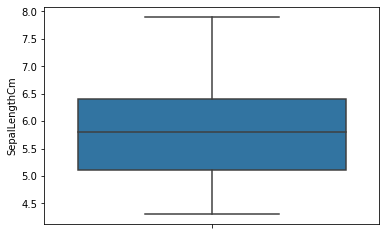

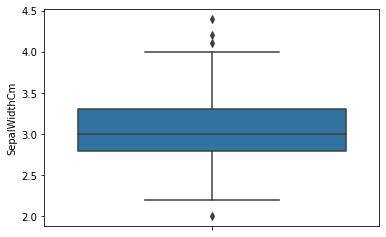

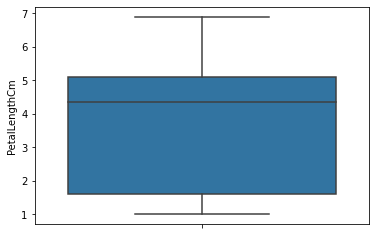

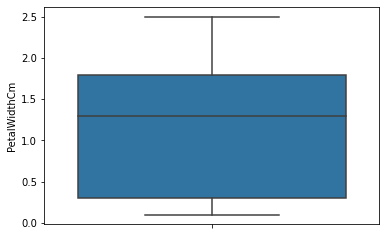

In [9]:
for x in data.columns:
    if data[x].dtypes != 'object':
        sns.boxplot(y=data[x])
        plt.show()

## Label Encoding

In [10]:
colname=[]
for x in data.columns:
    if data[x].dtypes == 'object':
        colname.append(x)
colname

['Species']

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in colname:
    data[x] = le.fit_transform(data[x])

### Data Visualization

#### Univariate Analysis

In [12]:
data.Species.unique()

array([0, 1, 2])

In [13]:
df_setosa=data.loc[data['Species']==0]
df_virginica=data.loc[data['Species']==2]
df_versicolor=data.loc[data['Species']==1]

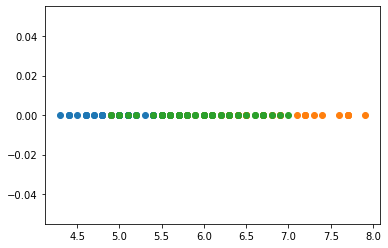

In [14]:
plt.plot(df_setosa['SepalLengthCm'],np.zeros_like(df_setosa['SepalLengthCm']),'o')
plt.plot(df_virginica['SepalLengthCm'],np.zeros_like(df_virginica['SepalLengthCm']),'o')
plt.plot(df_versicolor['SepalLengthCm'],np.zeros_like(df_versicolor['SepalLengthCm']),'o')
plt.show()

#### Bivariate Analysis

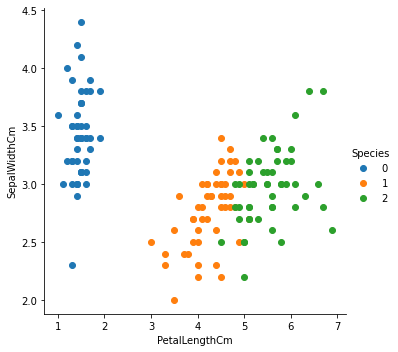

In [15]:
sns.FacetGrid(data,hue="Species",size=5).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend();
plt.show()

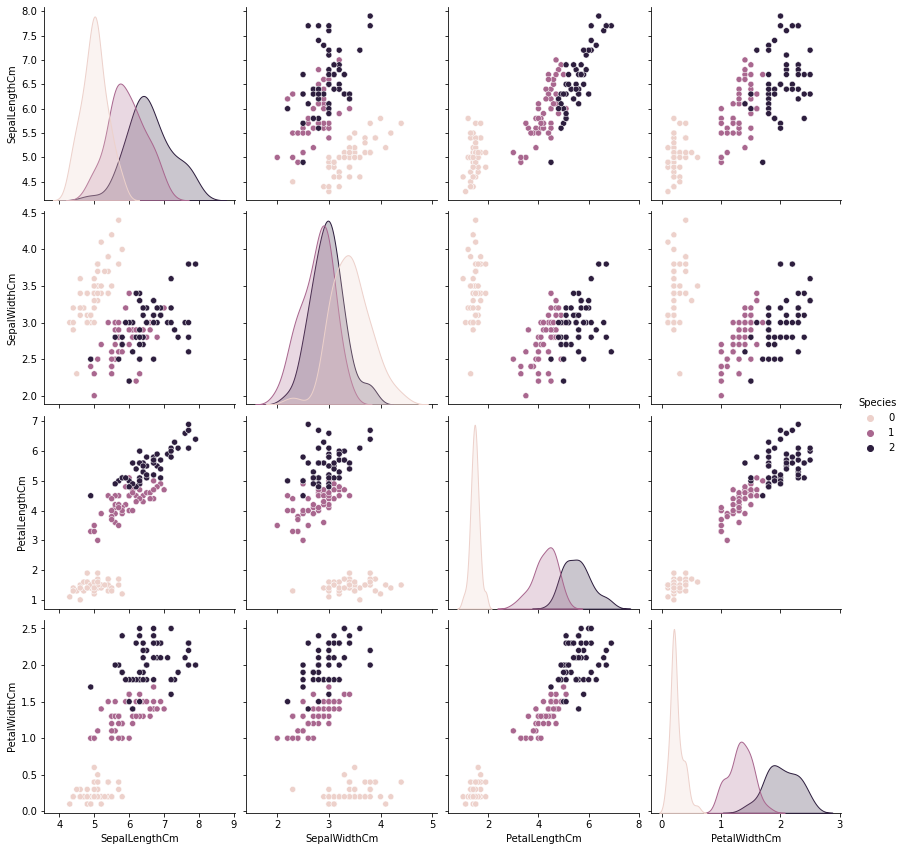

In [16]:
sns.pairplot(data,hue="Species",size=3)

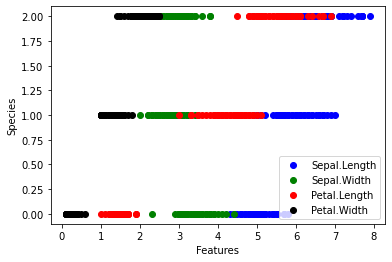

In [17]:
plt.xlabel("Features")
plt.ylabel("Species")

pltX=data.loc[:,"SepalLengthCm"]
pltY=data.loc[:,"Species"]
plt.scatter(pltX,pltY,color="blue",Label="Sepal.Length")

pltX=data.loc[:,"SepalWidthCm"]
pltY=data.loc[:,"Species"]
plt.scatter(pltX,pltY,color="green",Label="Sepal.Width")

pltX=data.loc[:,"PetalLengthCm"]
pltY=data.loc[:,"Species"]
plt.scatter(pltX,pltY,color="red",Label="Petal.Length")

pltX=data.loc[:,"PetalWidthCm"]
pltY=data.loc[:,"Species"]
plt.scatter(pltX,pltY,color="black",Label="Petal.Width")

plt.legend()


plt.show()

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>],
       [<AxesSubplot:title={'center':'Species'}>, <AxesSubplot:>]],
      dtype=object)

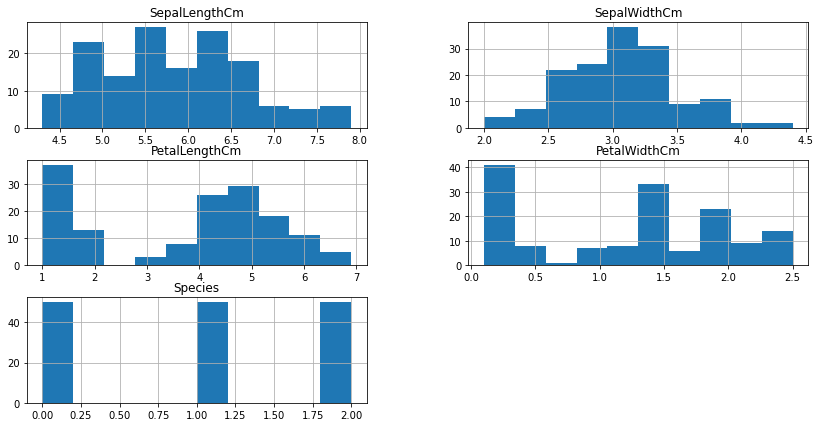

In [18]:
%matplotlib inline

data.hist(figsize=(14,7))

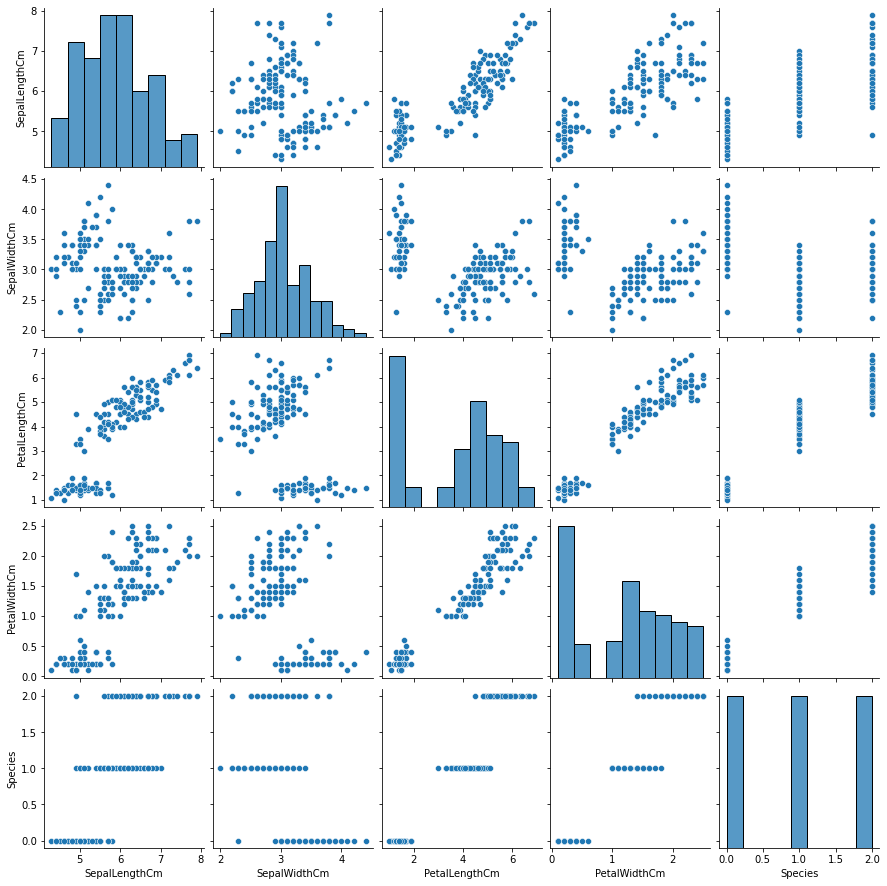

In [19]:
sns.pairplot(data,kind = "scatter")

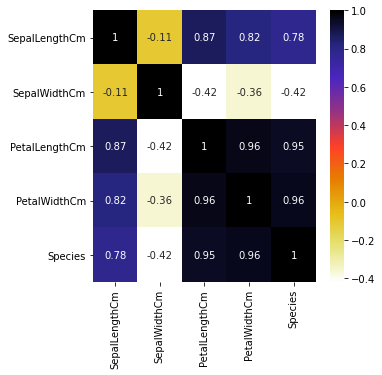

In [20]:
plt.figure(figsize=(5,5))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

## Create X & Y

In [21]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

## Split data into train & test

In [22]:
from sklearn.model_selection import train_test_split
## Split Train and Test DAta

## No order shuffling for X and Y

#Split the data into test and train

## SK Llearn by default takes 75-25
## Samples > 1000 take Test Data size=0.3
## Samples < 1000 take Test Data size=0.2

## No order shuffling for X and Y


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=10)

## Create Model

In [23]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini", min_samples_leaf=5,
                                          max_depth=10,
                                          random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)



DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=10)

In [24]:
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

## Evaluation

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



In [26]:
print(list(zip(data.columns,model_DecisionTree.feature_importances_)))

[('SepalLengthCm', 0.004659516718598471), ('SepalWidthCm', 0.0), ('PetalLengthCm', 0.42170979526738717), ('PetalWidthCm', 0.5736306880140143)]


### ROC AUC Score

In [32]:
from sklearn.metrics import roc_auc_score
y_pred_proba=model_DecisionTree.predict_proba(X_test)

In [33]:
roc_auc_score(Y_test,y_pred_proba,multi_class="ovr")

1.0

## Plot the Model

In [27]:
from sklearn import tree
from sklearn.tree import plot_tree

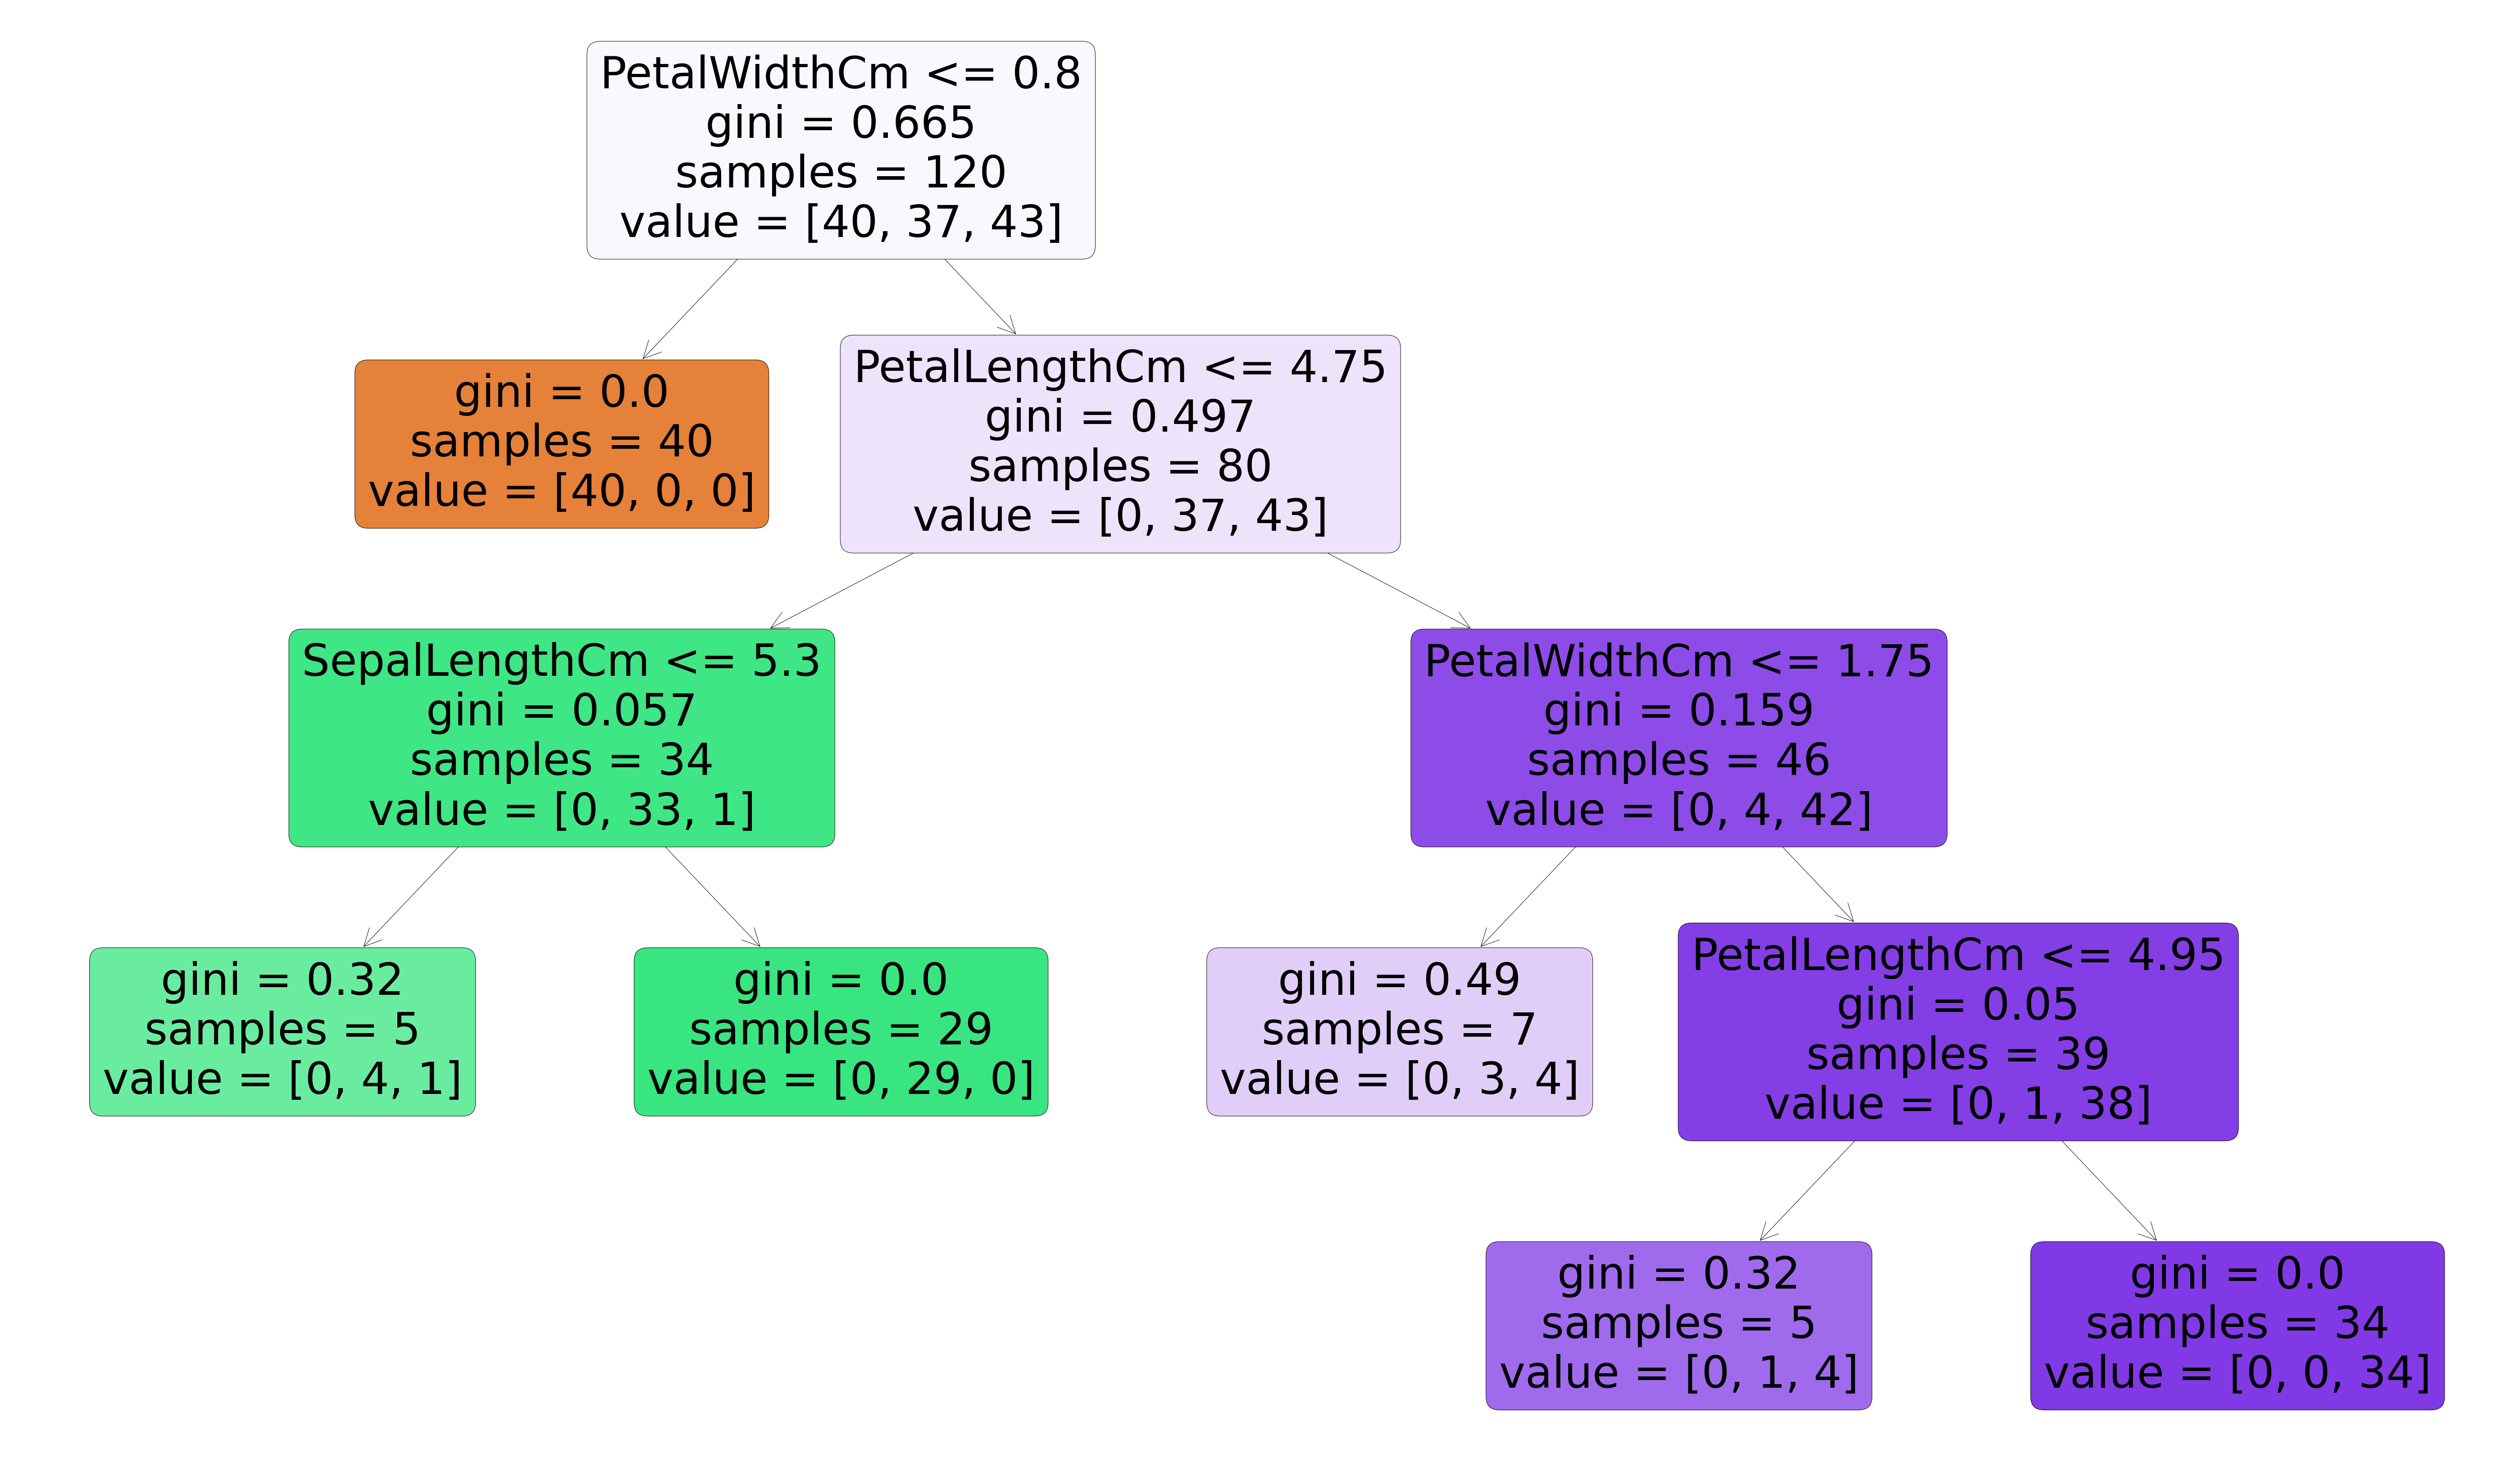

In [28]:
plt.figure(figsize=(100,60))
plot_tree(model_DecisionTree, filled=True, 
          feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
          rounded=True);

### Prediction on New data

In [ ]:
print("Enter measurement in cm")
sl=float(input("Enter Sepal Length:-"))
sw=float(input("Enter Sepal Width:-"))
pl=float(input("Enter Petal Length:-"))
pw=float(input("Enter Petal Width:-"))
sp=model_DecisionTree.predict([[sl,sw,pl,pw]])
if sp==0:
    print("Predicted Species is Setosa")
elif sp==1:
    print("Predicted Species is Versicolor")
elif sp==2:
    print("Predicted Species is Virginica")
else:
    print("Enter Valid Input")    